In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Prerna\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fashion_minst = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_minst.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
class_name =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

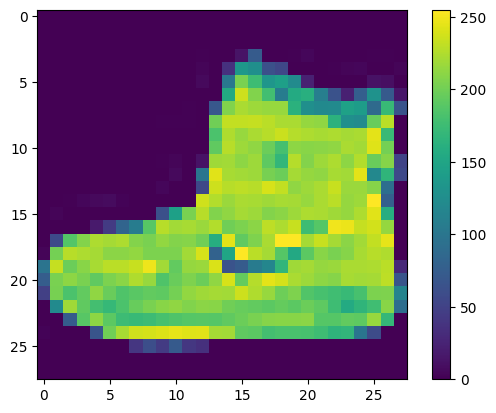

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images/255.0
test_images= test_images/255.0

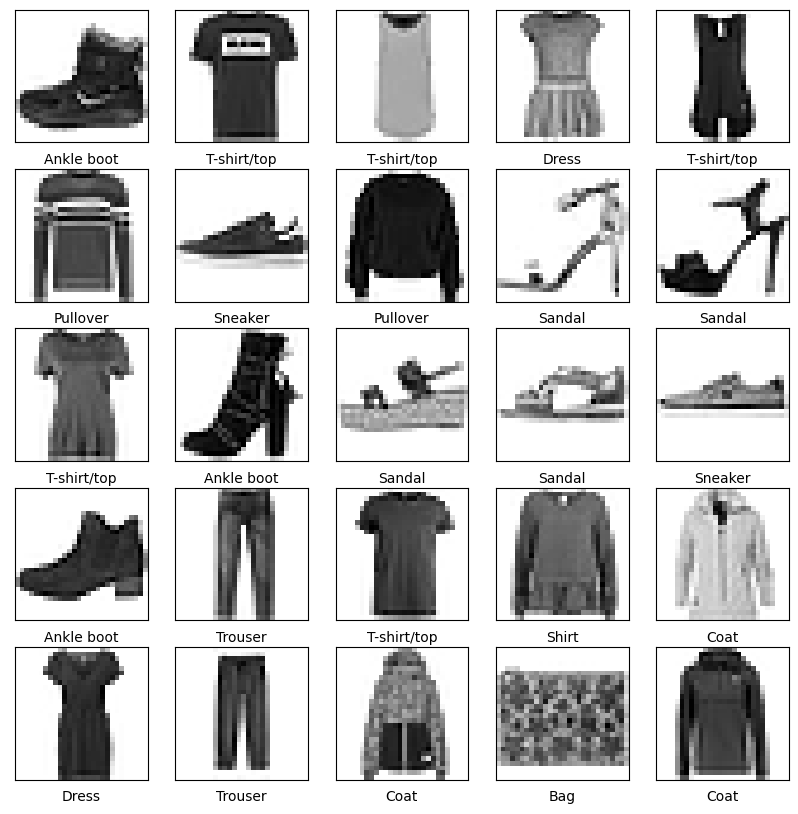

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images,train_labels,epochs =30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4964 - accuracy: 0.8247
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8645
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.8772
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8838
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.8920
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9000
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2571 - accuracy: 0.9033
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2472 - accuracy: 0.9083
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [10]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\n Test Accuracy:',test_acc)

313/313 - 1s - loss: 0.4132 - accuracy: 0.8836 - 850ms/epoch - 3ms/step

 Test Accuracy: 0.8835999965667725


In [11]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax() ])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
def plot_image(i,prediction_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid([False])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap= plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],100*np.max(prediction_array),class_name[true_label],color=color))

def plot_value_array(i,prediction_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),prediction_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

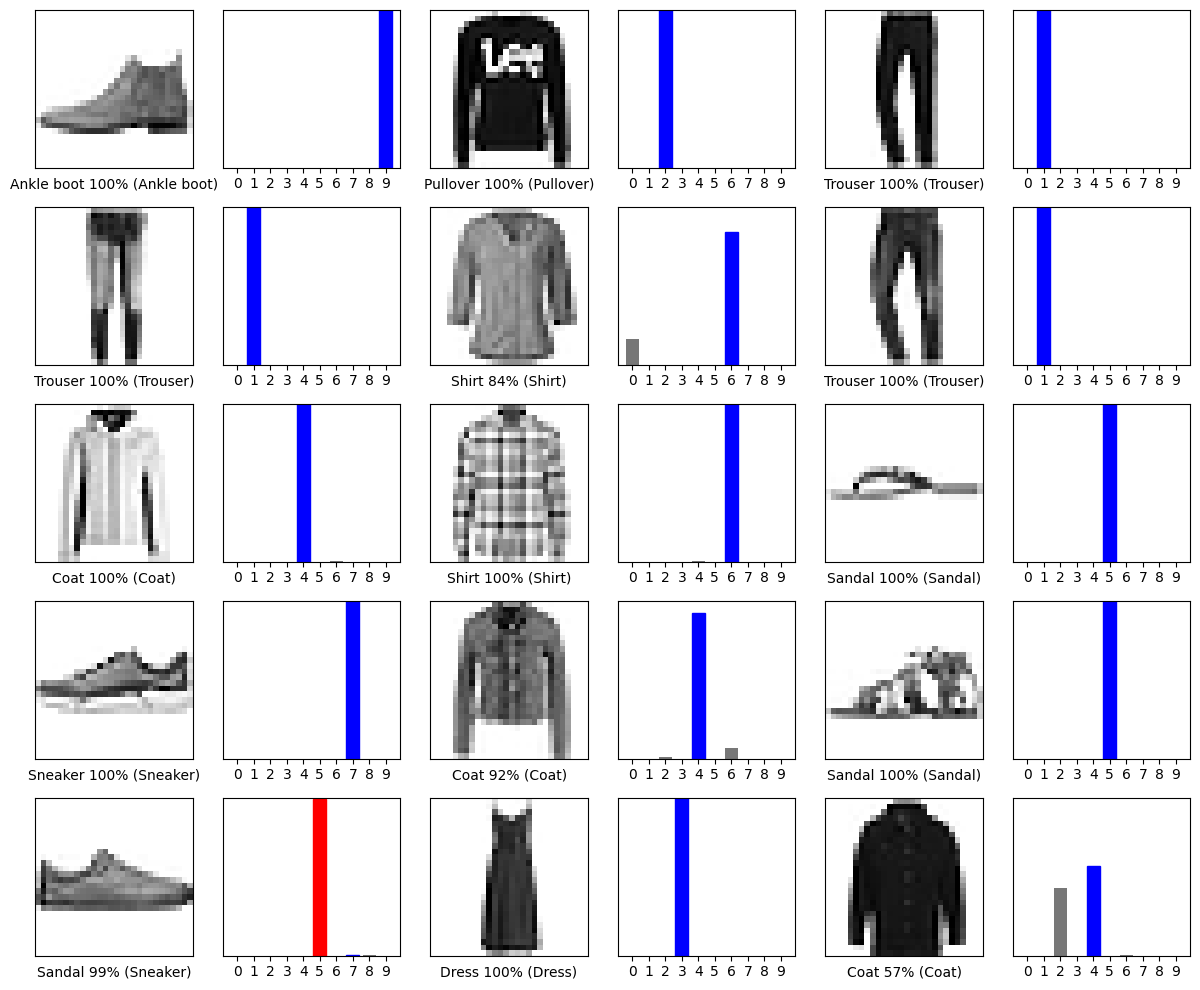

In [14]:
num_rows = 5
num_cols =3
num_images= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()
